In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import datetime
import statistics

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the preprocessed files for each months
jul = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202307-divvy-tripdata.csv')
aug = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202308-divvy-tripdata.csv')
sep = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202309-divvy-tripdata.csv')
oct = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202310-divvy-tripdata.csv')
nov = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202311-divvy-tripdata.csv')
dec = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202312-divvy-tripdata.csv')
jan = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202401-divvy-tripdata.csv')
feb = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202402-divvy-tripdata.csv')
mar = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202403-divvy-tripdata.csv')
apr = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202404-divvy-tripdata.csv')
may = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202405-divvy-tripdata.csv')
jun = pd.read_csv('/content/drive/MyDrive/AA Cyclistic/202406-divvy-tripdata.csv')

In [ ]:
# merging the data of all months to form a single data for the past year
df = pd.concat([jul, aug, sep, oct, nov, dec, jan, feb, mar, apr, may, jun], ignore_index=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5740211 entries, 0 to 5740210
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_length         object 
 14  day_of_week         int64  
 15  Unnamed: 15         float64
 16  Unnamed: 16         float64
 17  Unnamed: 17         float64
dtypes: float64(7), int64(1), object(10)
memory usage: 788.3+ MB


The dataset contains 5.7 million (5,740,211) records across 18 columns. The appearance of unnamed columns in the DataFrame is typically due to data import issues, empty fields, or parsing errors during the dataset extraction or formatting process. We will remove these in the next step.

In [ ]:
# check for missing values
df.isna().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name     933350
start_station_id       933350
end_station_name       980959
end_station_id         980959
start_lat                   0
start_lng                   0
end_lat                  7936
end_lng                  7936
member_casual               0
ride_length                 0
day_of_week                 0
Unnamed: 15           5740211
Unnamed: 16           5740211
Unnamed: 17           5740211
dtype: int64

In [ ]:
# dropping the irrelevant columns
df.drop(columns = ['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'], inplace=True)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,9340B064F0AEE130,electric_bike,07/23/23 20:06,07/23/23 20:22,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0:16:30,1
1,D1460EE3CE0D8AF8,classic_bike,07/23/23 17:05,07/23/23 17:18,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0:13:30,1
2,DF41BE31B895A25E,classic_bike,07/23/23 10:14,07/23/23 10:24,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0:09:36,1
3,9624A293749EF703,electric_bike,07/21/23 8:27,07/21/23 8:32,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0:04:56,6
4,2F68A6A4CDB4C99A,classic_bike,07/08/23 15:46,07/08/23 15:58,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0:11:26,7


* There are missing values in the columns start_station_name, start_station_id, end_station_name, end_station_id, end_lat and end_lng. For now, we will focus on the ride's duration and the day of the week.
* So, we will not drop the missing values in the columns start_station_name, start_station_id, end_station_name, and end_station_id as it would remove the lion's share from our data.
* Since there are no missing values in the columns we focus on, which are ride_length and day_of_week, we go ahead without dropping the above missing values.
* However, we impute the columns end_lat and end_lng using the mean.


In [ ]:
# impute end_lat and end_lng using mean
df['end_lat'] = df['end_lat'].fillna(df['end_lat'].mean())
df['end_lng'] = df['end_lng'].fillna(df['end_lng'].mean())

# confirm the imputation
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    933350
start_station_id      933350
end_station_name      980959
end_station_id        980959
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
ride_length                0
day_of_week                0
dtype: int64

In [ ]:
# check for duplicates
df.duplicated().sum()

0

* And we see that there are duplicated records present in our data.
* Now, Going for the descriptive analysis, we have,


In [ ]:
# Summary statistics for the entire dataset
print("Summary Statistics for the Entire Dataset:")
print(df.describe())

# Summary statistics for annual members
print("\nSummary Statistics for Annual Members:")
print(df[df['member_casual'] == 'member'].describe())

# Summary statistics for casual riders
print("\nSummary Statistics for Casual Riders:")
print(df[df['member_casual'] == 'casual'].describe())

Summary Statistics for the Entire Dataset:
          start_lat     start_lng       end_lat       end_lng   day_of_week
count  5.740211e+06  5.740211e+06  5.740211e+06  5.740211e+06  5.740211e+06
mean   4.190288e+01 -8.764667e+01  4.190325e+01 -8.764689e+01  4.088204e+00
std    4.517871e-02  2.729548e-02  4.853924e-02  4.570883e-02  2.002692e+00
min    4.163000e+01 -8.794000e+01  0.000000e+00 -8.812000e+01  1.000000e+00
25%    4.188096e+01 -8.766000e+01  4.188103e+01 -8.766000e+01  2.000000e+00
50%    4.189897e+01 -8.764336e+01  4.189993e+01 -8.764395e+01  4.000000e+00
75%    4.193000e+01 -8.762963e+01  4.193000e+01 -8.762979e+01  6.000000e+00
max    4.207000e+01 -8.746000e+01  4.219000e+01  0.000000e+00  7.000000e+00

Summary Statistics for Annual Members:
          start_lat     start_lng       end_lat       end_lng   day_of_week
count  3.688363e+06  3.688363e+06  3.688363e+06  3.688363e+06  3.688363e+06
mean   4.190232e+01 -8.764741e+01  4.190261e+01 -8.764756e+01  4.053541e+00
std  

* Annual members tend to use the service slightly more consistently throughout the week, with a mean day of the week of 4.05 compared to casual riders' 4.15. This suggests a slightly more varied usage pattern among casual riders.
* Casual riders show higher variability in trip destinations, as indicated by the larger standard deviation in end latitude and longitude values. This variability could mean broader use cases like tourism or recreational activities.
* In the 5.74 million rides, there are approximately 3.69 million rides by annual members, whereas, casual rides amount to approximately 2.05.
* The average day of the week for rides is around Thursday, with a slight shift for casual riders indicating they might ride more on weekends. However, Thursday cannot be the most frequent day.


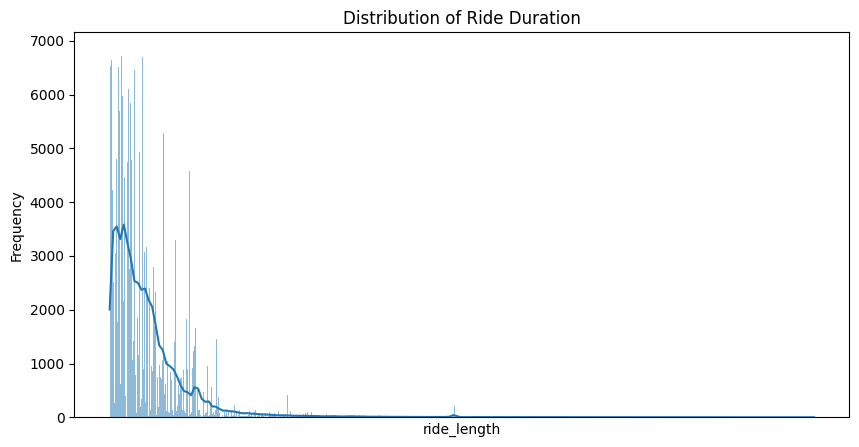

In [ ]:
# plotting the distribution of Ride duration
plt.figure(figsize=(10, 5))
sns.histplot(df['ride_length'], bins = 50, kde=True)
plt.title('Distribution of Ride Duration')
plt.gca().set_xticks([])
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Cleaning the ride_length column - Ensure all entries are in HH:MM:SS format
# Using regex to filter out invalid entries
valid_format = df['ride_length'].str.match(r'^\d+:\d{2}:\d{2}$')
df = df[valid_format]

# Convert 'ride_length' to timedelta
df['ride_length'] = pd.to_timedelta(df['ride_length'])

df['ride_length'].describe()

count                      5739542
mean     0 days 00:18:19.193484950
std      0 days 02:38:40.112531189
min                0 days 00:00:00
25%                0 days 00:05:33
50%                0 days 00:09:44
75%                0 days 00:17:16
max               68 days 09:29:04
Name: ride_length, dtype: object

From the above analyses, we have the following findings,
* The average ride length is approximately 18 minutes and 19 seconds (0 days 00:18:19.193484950) and the standard deviation is about 2 hours, 38 minutes, and 40 seconds (0 days 02:38:40.112531189), indicating a high variability in ride lengths.
* The median ride length is about 9 minutes and 44 seconds (0 days 00:09:44). This means that half of the rides are shorter than 9 minutes and 44 seconds, and half are longer.
*	The majority of rides are relatively short, as indicated by the 25th, 50th, and 75th percentiles, which are all under 20 minutes. The mean ride length being higher than the median suggests that there are some very long rides that skew the average upwards.
*	There is a high standard deviation, which indicates significant variability in ride lengths. This could be due to a mix of different use cases, such as short commutes versus longer leisure rides.
*	Coming to the graph, the graph shows that a significant number of bike rides have short durations. This suggests that many users use bikes for quick trips or short distances. The peak around shorter duration suggests that the company’s bikes are well-suited for short trips, such as within a city center or for last-mile transportation.
*	While short rides dominate, a tail still extends to the right, indicating longer ride durations as well. To optimize bike availability and maintenance, Cyclistic could focus on ensuring a sufficient number of bikes for short rides while also catering to users who need longer durations.


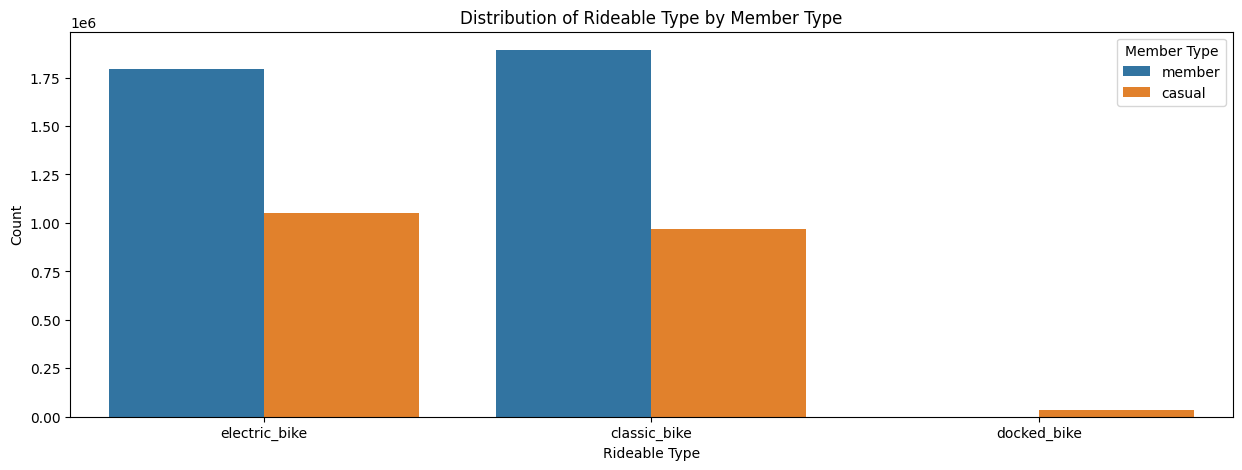

In [ ]:
# Distribution of rideable type
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='rideable_type', hue='member_casual')
plt.title('Distribution of Rideable Type by Member Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.legend(title='Member Type', loc='upper right')
plt.show()

* The above bar plot illustrates the distribution of rideable bike types among annual members and casual users. We have three types of bikes: electric bikes, classic bikes, and docked bikes.
*	Both annual members and casual riders use electric bikes frequently, but annual members use them more. Classic bikes are the most popular type among both members and casual riders, with members again showing higher usage. Docked bikes are bikes that must be picked up from and returned to designated docking stations. Docked bikes are the least popular option for both groups, indicating a strong preference for electric and classic bikes.
*	Members and casual riders both prefer classic bikes the most, followed by electric bikes, with docked bikes being the least preferred. Members consistently show higher usage of both electric and classic bikes compared to casual riders.
*	Cyclistic has to focus more on maintaining and increasing their fleet of electric and classic bikes due to their high demand. Understanding the reasons behind the low popularity of docked bikes might reveal opportunities for service improvements or fleet optimisation.


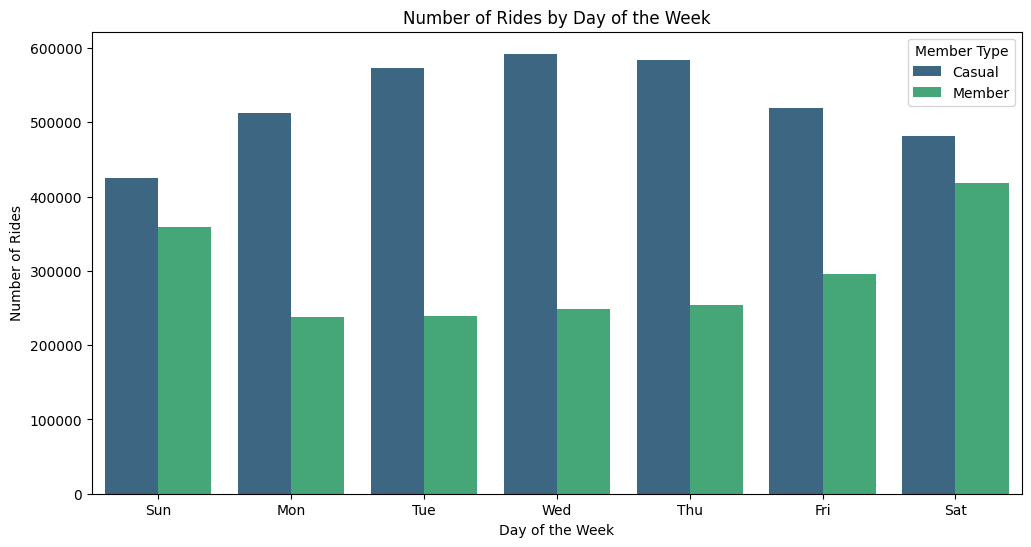

In [ ]:
# Plotting the distribution of rides by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day_of_week', hue='member_casual', palette='viridis')
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.legend(title='Member Type', loc='upper right', labels=['Casual', 'Member'])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

* Annual Members take more bike rides on weekends (Saturday and Sunday). This suggests that weekends are popular for leisurely rides or recreational biking. They are consistent on weekdays (monday to Friday), possibly for commuting or regular transportation. The consistent weekday usage by Members suggests that they rely on bikes for daily transportation needs.
*	On weekdays, casual riders consistently outpace Casual riders, suggesting that they use bikes for daily transportation needs. They use comprise of more bikes than annual members even on weekdays. The higher number of rides on weekends indicates that people use bikes for non-work-related activities during their free time.
*	The company can allocate more bikes on weekdays to meet the increased demand. Weekend bike availability should cater to Members' commuting needs. Marketing efforts could encourage Casual riders to use bikes during weekends.


In [ ]:
# Dictionary mapping numeric day of week to day names
day_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

# Calculate the mode of day_of_week
mode_day_of_week = statistics.mode(jul['day_of_week'])
mode_day_name = day_mapping[mode_day_of_week]
print("Mode day of week:", mode_day_name)

Mode day of week: Saturday


* This suggests that Saturday has the highest frequency of bike usage compared to any other day, likely reflecting increased recreational or leisure activities during the weekend. Cyclistic can use this insight to ensure that more bikes are available on Saturdays to accommodate the higher demand.

In [ ]:
# average ride_length for members and casual riders
avg_member_ride_length = df[df['member_casual'] == 'member']['ride_length'].mean()
avg_casual_ride_length = df[df['member_casual'] == 'casual']['ride_length'].mean()

print("Average member ride length:", avg_member_ride_length)
print("Average casual ride length:", avg_casual_ride_length)

Average member ride length: 0 days 00:12:59.164767768
Average casual ride length: 0 days 00:27:54.506756186


* On average, annual members ride for about 12 minutes and 59 seconds per ride. While this being the case, casual riders ride for about 27 minutes and 54 seconds per ride on average.
*	Members tend to take shorter rides compared to casual riders, with an average ride duration of just under 13 minutes. This could suggest that members might use the service for shorter commuting or regular short trips.
*	Casual riders, on the other hand, take longer rides on average, almost 28 minutes per ride. This longer duration might indicate that casual riders use the service for leisurely rides, sightseeing, or longer trips compared to members.
*	These insights into average ride lengths can be used to make informed decisions related to service offerings, pricing strategies, or resource allocation within the bike-sharing system.


In [ ]:
# average ride_length for users by day_of_week
avg_ride_length_by_day = df.groupby('day_of_week')['ride_length'].mean()

# Dictionary mapping numeric day of week to day names
day_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

# Print the average ride_length for each day of the week
for day, avg_length in avg_ride_length_by_day.items():
    day_name = day_mapping[day]
    print(f"Average ride length on {day_name}: {avg_length}")

Average ride length on Sunday: 0 days 00:22:53.281846479
Average ride length on Monday: 0 days 00:17:08.447597836
Average ride length on Tuesday: 0 days 00:16:08.652066412
Average ride length on Wednesday: 0 days 00:16:02.092353046
Average ride length on Thursday: 0 days 00:16:00.786218339
Average ride length on Friday: 0 days 00:17:51.678901648
Average ride length on Saturday: 0 days 00:21:59.042420794


* Sunday shows the longest average ride length at approximately 22 minutes and 53 seconds, followed closely by Saturday, with an average ride length of about 21 minutes and 59 seconds, reinforcing that weekends might see more leisurely or longer rides.
*	These weekdays generally have a shorter average ride lengths ranging from about 16 to 18 minutes, indicating possibly more utilitarian or shorter-distance rides during the weekdays compared to weekends.  However, these days exhibit very similar average ride lengths. This consistency might indicate stable usage patterns or commuter behaviour with relatively predictable ride durations during the weekdays.
*	Given the longer average ride lengths on weekends (Sunday and Saturday), bike-sharing services might consider special promotions or incentives to attract more riders during these days. Similarly, understanding the shorter average ride lengths on weekdays could influence operational decisions such as bike deployment or service availability adjustments to cater to shorter, possibly commuter-focused rides.


In [ ]:
# number of rides for users by day_of_week
rides_by_day = jul.groupby('day_of_week')['ride_id'].count()

# Dictionary mapping numeric day of week to day names
day_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

# Print the number of rides for each day of the week
for day, count in rides_by_day.items():
    day_name = day_mapping[day]
    print(f"Number of rides on {day_name}: {count}")


Number of rides on Sunday: 116825
Number of rides on Monday: 122535
Number of rides on Tuesday: 101697
Number of rides on Wednesday: 81886
Number of rides on Thursday: 104125
Number of rides on Friday: 104026
Number of rides on Saturday: 136556


* As we saw earlier, Saturday has the highest number of rides with 136,556 rides. Then, Sunday follows with 116,825 rides. This indicates that the bike-sharing service is most popular on weekends, likely due to people having more free time for leisure activities and outings.
*	The number of rides tends to be lower in the middle of the week, particularly on Wednesday which has the lowest count of 81,886 rides. Tuesday and Thursday also have relatively lower numbers compared to the start and end of the work week, with 101,697 and 104,125 rides respectively.
*	A pattern can be seen on the beginning and end of each weeks. Mondays see a significant number of rides with 122,535 rides, suggesting a busy start to the work week with people possibly commuting to work or starting their week with activities. Similarly, the end of the week, Friday also has a relatively high number of rides at 104,026, which may reflect people preparing for the weekend or winding down their work week.
*	Given the high usage on weekends, targeted promotions or special offers could be implemented to further capitalize on this peak period. Strategies to boost mid-week usage such as mid-week discounts, special events, or partnerships with local businesses to incentivize riding could be beneficial.
*	The relatively high number of rides on Monday and Friday suggests that many users might be using the service for commuting. Enhancing commuter-friendly features such as ensuring that bikes are readily available and in good condition during rush hours, planning maintenance schedules during the non-peak hours and providing convenient docking stations near business districts could improve user satisfaction.


<ipython-input-13-08cffe11d5a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['started_at'] = pd.to_datetime(df_filtered['started_at'], format='%m/%d/%y %H:%M', errors='coerce')
<ipython-input-13-08cffe11d5a7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['started_at'].dt.month


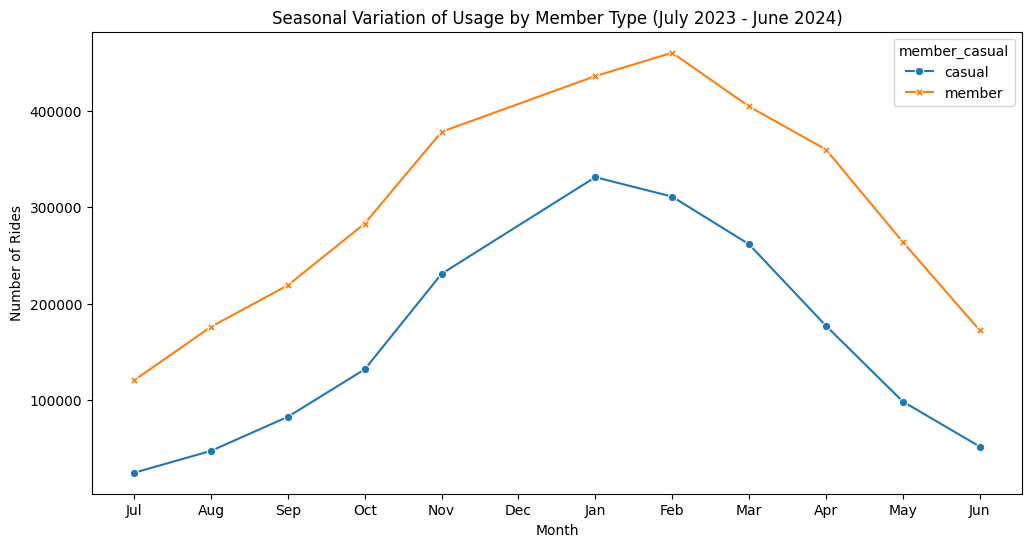

In [ ]:
# Specify the format of the 'started_at' column
df['started_at'] = pd.to_datetime(df['started_at'], format='%m/%d/%y %H:%M', errors='coerce')

# Extract the month from the 'started_at' column
df['month'] = df['started_at'].dt.month

# Filter data from July 2023 to June 2024
df_filtered = df[(df['started_at'] >= '2023-07-01') & (df['started_at'] <= '2024-06-30')]

# Specify the format of the 'started_at' column
df_filtered['started_at'] = pd.to_datetime(df_filtered['started_at'], format='%m/%d/%y %H:%M', errors='coerce')

# Extract the month from the 'started_at' column
df_filtered['month'] = df_filtered['started_at'].dt.month

# Group data by month and member type
grouped_data = df_filtered.groupby(['month', 'member_casual'])['ride_id'].count().unstack()

# Create a line chart with two lines, one for casual and one for member rides
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, markers=True, dashes=False)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Seasonal Variation of Usage by Member Type (July 2023 - June 2024)')

# Label the months on the x-axis
plt.xticks(ticks=range(1, 13), labels=['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Show the plot
plt.show()

* The line representing casual riders starts lower in July and gradually increases. The peak for casual riders occurs in December - January, suggesting higher usage during the holiday season. After the new year, the casual rider line declines and remains below the member line.
*	The member line peaks from July, possibly due to regular commuters. Members consistently have a higher number of rides compared to casual riders across all months. It gradually declines after November. Both the annual users and casual riders show more pronounced seasonal variation, with peaks in December and dips in summer.
*	Both member and casual rider usage shows a distinct seasonal pattern. There is a general increase in usage for both groups from July to January, followed by a steady decline from February to June.
*	The increase in bike usage during the winter months (November to January) might be influenced by favourable weather conditions, holidays, and potential seasonal promotions. While, the decline during the summer months (April to july) could be due to adverse weather conditions, vacations, or other factors reducing the need for bike usage.
*	Cyclistic can allocate more resources and bikes during peak months (November to January) to meet the higher demand. Implementing marketing strategies during the off-peak months (April to July) might help in balancing the usage throughout the year.
*	The consistent higher usage among members suggests that membership benefits are appealing. Cyclistic could highlight these benefits to encourage more casual riders to become members.
*	Understanding these trends allows Cyclistic to plan maintenance and operational activities during lower demand periods to minimize service disruptions.
